#**Chemical space visualization**

This notebook explores the chemical space distribution of top predicted active compounds across newly designed target-focused libraries. Using t-SNE visualizations based on Morgan Chiral fingerprints (radius 2, 2048-bit), we assess the structural diversity of these compounds.

This analysis highlights variability in structural diversity, emphasizing the need to refine library design and model training to enhance the identification of high-confidence active compounds.

With this notebook, you can dive deeper into the data, explore these patterns, and gain insights into how these libraries can be optimized for better predictive outcomes.

**Note:** This notebook provides an example of the chemical space visualization for compounds from IAV_Polymerase (PA) generated library.

##**1. Prepare the environment**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgba
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist
from rdkit.Chem import rdFingerprintGenerator

###**1.1. Load and prepare the data set**

In [ ]:
# Load data (adjust route for each target)
df = pd.read_csv('/home/invitado/gaby/iavpoly_filtered_0.5.csv')

In [ ]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 2048, includeChirality = True)

###**1.2 Fingerprints generation**

In [ ]:
# Generate fingerprints
def generate_fingerprint(smiles):
  """
  Generates a fingerprint for a given SMILES string.
  Handles invalid SMILES by returning None.
  """
  mol = Chem.MolFromSmiles(smiles)
  if mol:
    return mfpgen.GetFingerprint(mol)
  else:
    print(f"Invalid SMILES: {smiles}")  # Print invalid SMILES for debugging
    return None

df["fingerprint"] = df["Canonical_SMILES_STD"].apply(generate_fingerprint)

# Remove rows with None fingerprints
df = df.dropna(subset=["fingerprint"])

In [ ]:
df

,Canonical_SMILES_STD,ID,DB,Num_Reps,prediction_label_iavpoly_svm,prediction_label_iavpoly_et,prediction_score_iavpoly_et,prediction_label_iavpoly_gbc,prediction_score_iavpoly_gbc,consensus_iavpoly,IAV_Polymerase (PA)_Pairsim,IAV_Polymerase (PA)_Quartile_fp,IAV_Polymerase (PA)_Distance,IAV_Polymerase (PA)_Quartile_prop,fingerprint
0,CSc1ccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CCCO)cc1,"1418_ChD_AvL, 107792_OT_DLGC","ChD_AvL, OT_DLGC",2,1,1,0.57,1,0.9781,3,0.831317,Q2,4.344468,Q1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,COc1cccc(C(=O)C2=C(O)C(=O)N(CCN(C)C)C2c2ccc(OC...,"68654_OT_DLGC, 2159_LC_HFL, 201_LC_covL, 33593...","OT_DLGC, LC_HFL, LC_covL, LC_MASS, LC_ASCL2DS,...",7,1,1,0.51,1,0.8332,3,0.832781,Q2,4.251707,Q1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,O=C(O)c1cc(-n2cnnn2)ccc1O,123565_OT_DLGC,OT_DLGC,1,1,1,0.59,1,0.8126,3,0.823504,Q2,4.273113,Q1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCOc1ccc(C(=O)C2=C(O)C(=O)N(Cc3ccco3)C2c2ccc(C...,102459_OT_DLGC,OT_DLGC,1,1,1,0.63,1,0.9654,3,0.830857,Q2,4.474904,Q2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,Cc1ccc(C(=O)C2=C(O)C(=O)N(CCN(C)C)C2c2ccc(F)cc...,"100361_OT_DLGC, 30086_LC_MASS, 9938_LC_ASCL2DS","OT_DLGC, LC_MASS, LC_ASCL2DS",3,1,1,0.53,1,0.9297,3,0.832808,Q2,4.495310,Q2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,Cc1cc(N/C(=N\S(=O)(=O)c2ccc(Br)cc2)c2ccccc2)ccc1O,15068_OT_DLGC,OT_DLGC,1,1,1,0.54,1,0.7164,3,0.944192,Out,6.046758,Q4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9230,CCOc1cc(C2C(C(=O)c3ccc(F)cc3)=C(O)C(=O)N2c2nc(...,31279_OT_DLGC,OT_DLGC,1,1,1,0.55,1,0.5369,3,0.935685,Out,5.491834,Q4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9231,CCOc1cc(C2c3c(oc4ccc(Cl)cc4c3=O)C(=O)N2CCCN2CC...,114924_OT_DLGC,OT_DLGC,1,1,1,0.72,1,0.8751,3,0.933489,Out,17.862798,Out,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9232,COc1cccc(Oc2c(C)oc3c(CN4CCCCCC4)c(O)ccc3c2=O)c1,78952_OT_DLGC,OT_DLGC,1,1,1,0.57,1,0.6704,3,0.930389,Out,22.392268,Out,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


###**1.3 Prepare DataFrame**

In [ ]:
data = []

for i in df['fingerprint']:
  fp = i.ToBitString()
  data.append(list(fp))

fingerprint_df = pd.DataFrame(data)

# Reset the index of both DataFrames to ensure they align
df = df.reset_index(drop=True)
fingerprint_df = fingerprint_df.reset_index(drop=True)

# Concat original DataFrame with the fingerprints one
result_df = pd.concat([df[['Canonical_SMILES_STD', 'DB', 'IAV_Polymerase (PA)_Quartile_fp']], fingerprint_df], axis=1)

result_df

,Canonical_SMILES_STD,DB,IAV_Polymerase (PA)_Quartile_fp,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CSc1ccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CCCO)cc1,"ChD_AvL, OT_DLGC",Q2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COc1cccc(C(=O)C2=C(O)C(=O)N(CCN(C)C)C2c2ccc(OC...,"OT_DLGC, LC_HFL, LC_covL, LC_MASS, LC_ASCL2DS,...",Q2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)c1cc(-n2cnnn2)ccc1O,OT_DLGC,Q2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCOc1ccc(C(=O)C2=C(O)C(=O)N(Cc3ccco3)C2c2ccc(C...,OT_DLGC,Q2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cc1ccc(C(=O)C2=C(O)C(=O)N(CCN(C)C)C2c2ccc(F)cc...,"OT_DLGC, LC_MASS, LC_ASCL2DS",Q2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,Cc1cc(N/C(=N\S(=O)(=O)c2ccc(Br)cc2)c2ccccc2)ccc1O,OT_DLGC,Out,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9230,CCOc1cc(C2C(C(=O)c3ccc(F)cc3)=C(O)C(=O)N2c2nc(...,OT_DLGC,Out,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9231,CCOc1cc(C2c3c(oc4ccc(Cl)cc4c3=O)C(=O)N2CCCN2CC...,OT_DLGC,Out,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9232,COc1cccc(Oc2c(C)oc3c(CN4CCCCCC4)c(O)ccc3c2=O)c1,OT_DLGC,Out,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**2. Chemical space visualization**

In [ ]:
# Train t-SNE model
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = result_df.copy()
data_tsne = data_tsne.drop(labels = ['Canonical_SMILES_STD', 'DB', 'IAV_Polymerase (PA)_Quartile_fp'],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', max_iter=None, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, n_iter='deprecated')
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

array([[-52.36735  ,  68.21646  ],
       [ 17.906883 ,  -2.9052124],
       [-18.476192 , -15.984937 ],
       ...,
       [ 27.075357 ,  79.151855 ],
       [-80.49444  , -15.870158 ],
       [ 79.658516 ,  51.468636 ]], dtype=float32)

In [ ]:
# Select complementary information
label = result_df[['Canonical_SMILES_STD', 'IAV_Polymerase (PA)_Quartile_fp']]
label = label.to_numpy()
label.shape

(9234, 2)

In [ ]:
# Concat numpy arrays
arr = np.concatenate((label, tsne_results), axis = 1)
arr.shape

(9234, 4)

In [ ]:
# Create new DataFrame
tsne_dataset = pd.DataFrame(data=arr, columns = ['Canonical_SMILES_STD', 'IAV_Polymerase (PA)_Quartile_fp','axis 1', 'axis 2'] )
tsne_dataset.head(2)

,Canonical_SMILES_STD,IAV_Polymerase (PA)_Quartile_fp,axis 1,axis 2
0,CSc1ccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CCCO)cc1,Q2,-52.367352,68.216461
1,COc1cccc(C(=O)C2=C(O)C(=O)N(CCN(C)C)C2c2ccc(OC...,Q2,17.906883,-2.905212


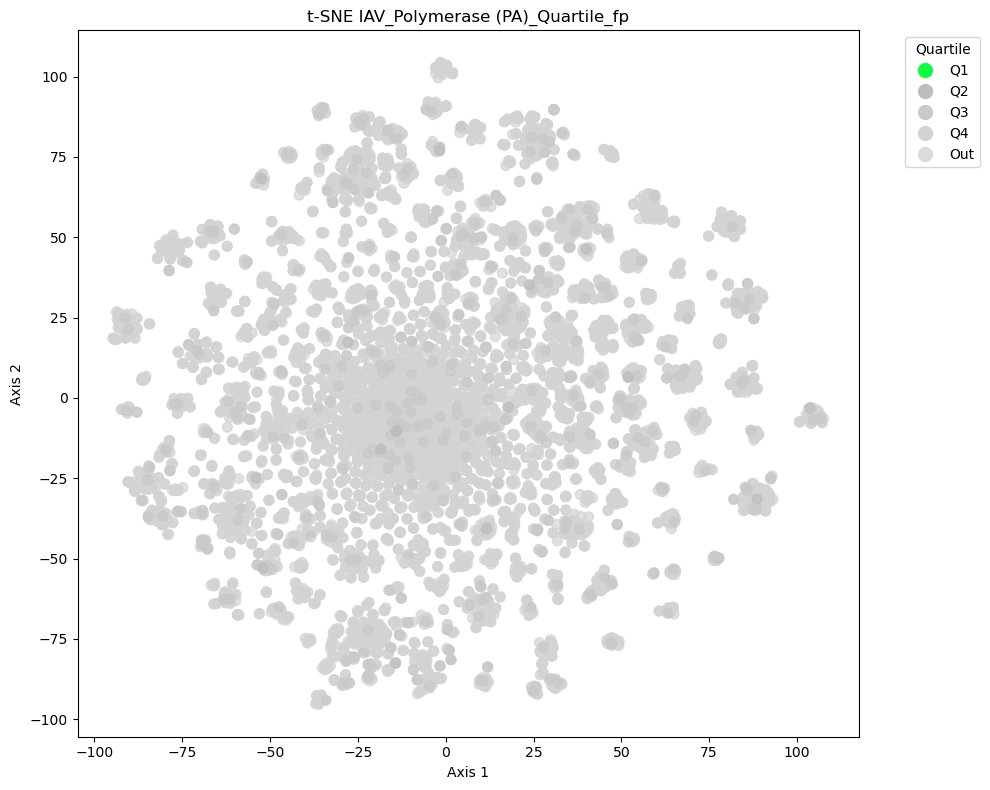

In [ ]:
quartile_colors = {
    'Q1': '#11fb40',  # Green
    'Q2': '#bdbdbd',  # Gray
    'Q3': '#c9c9c9',  # Shade 1
    'Q4': '#d3d3d3',  # Shade 2
    'Out': '#dcdcdc', # Shade 3
}

tsne_dataset['color_quartile'] = tsne_dataset['IAV_Polymerase (PA)_Quartile_fp'].map(quartile_colors)

import matplotlib.pyplot as plt

# Order quartiles
quartile_order = ['Out', 'Q4', 'Q3', 'Q2', 'Q1']

# Ordenar DataFrame
tsne_dataset['quartile_rank'] = tsne_dataset['IAV_Polymerase (PA)_Quartile_fp'].map({q: i for i, q in enumerate(quartile_order)})
tsne_dataset = tsne_dataset.sort_values(by='quartile_rank')

# Chemical space visualization according to Quartiles
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    tsne_dataset['axis 1'], tsne_dataset['axis 2'],
    c=tsne_dataset['color_quartile'],
    s=50,
    alpha=0.7
)

# Quartile's legend
handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None')
           for quartile, color in quartile_colors.items()]
labels = list(quartile_colors.keys())
plt.legend(handles, labels, title="Quartile", bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting title and axes
plt.title("t-SNE IAV_Polymerase (PA)_Quartile_fp")
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.tight_layout()

# Save visualization
plt.savefig('t-SNE_IAV_Polymerase (PA)_Quartile_fp_only_ordered_0.5_def.png', dpi=600)

plt.show()


##**3. Count compounds**

In [ ]:
# Count of compounds of this library on each Quartile
print(tsne_dataset['IAV_Polymerase (PA)_Quartile_fp'].value_counts(dropna=False))

IAV_Polymerase (PA)_Quartile_fp
Q4     8683
Q3      410
Out     125
Q2       16
Name: count, dtype: int64
